In [18]:
import numpy as np
from pye2198 import Cell

In [2]:
c = Cell(17111)

In [3]:
c.get_paths(downscale_factor=10) # the raw data have way more points than needed 

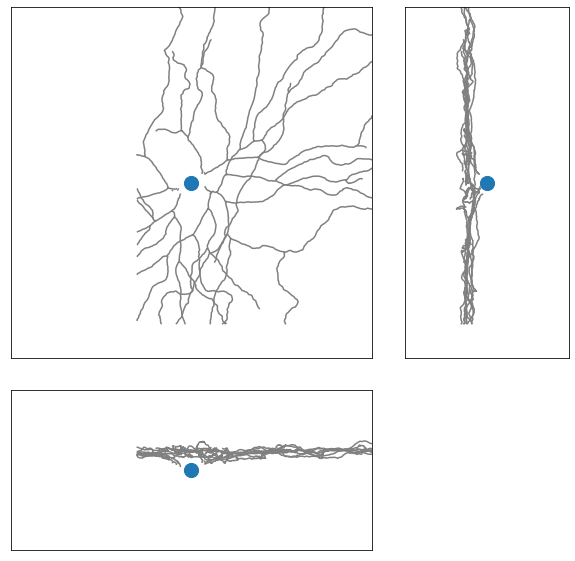

In [4]:
c.plot_morph()

In [14]:
c.find_paths_connect_to_soma(scale_factors=[1, 1.5, 2, 2.5, 3]) # then we need to find the those paths connected to the soma

Potential paths connected to soma:

  [0] #0: []
  [1] #8: [ 0 35 48 53 62 63 64 69]
  [2] #14: [ 0  1  2  5 13 35 48 50 51 53 62 63 64 69]
  [3] #18: [ 0  1  2  3  4  5 13 35 37 39 48 50 51 53 62 63 64 69]
  [4] #26: [ 0  1  2  3  4  5  9 12 13 20 30 35 37 39 42 44 48 50 51 53 56 59 62 63
 64 69]


In [15]:
# from the figure above we can see there are four paths connected to the soma, so we adjust the scale_factor to get their path id
c.find_paths_connect_to_soma(scale_factors=[1.1])

Potential paths connected to soma:

  [0] #4: [ 0 35 63 64]


In [19]:
path_ids = np.array([0, 35, 63, 64])
c.add_soma_to_path(path_ids)

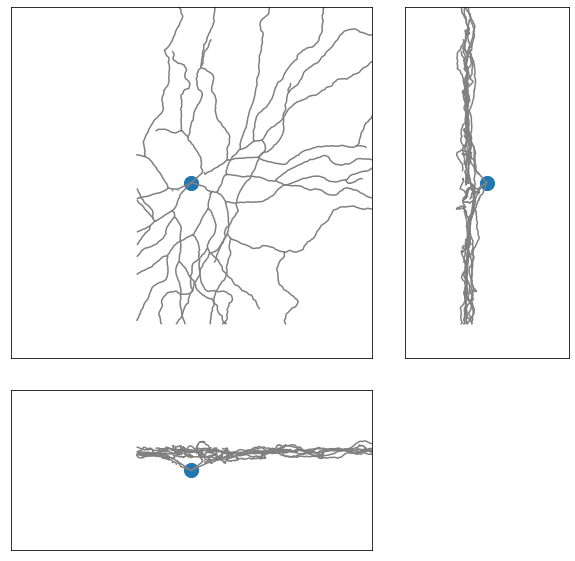

In [20]:
c.plot_morph() # plot again, and we can see the well connected cell

In [29]:
c.df_paths # now we have all paths but we have no idea which one connected to which one.

,nodes,nodes_downsampled,path,connect_to_at,connect_to
0,"[0, 9, 8, 7, 6, 5, 4, 3, 2, 1, 10, 11, 12, 20,...","[0, 9, 6, 19, 42, 25, 84, 138, 168, 201, 322, ...","[[0.0, 0.0, 0.0], [11.5, -3.6300000000000003, ...","[0.0, 0.0, 0.0]",-1.0
1,"[57, 56, 55, 54, 53, 52, 51, 66, 65, 64, 97, 1...","[3009, 3010, 2519, 2426, 1879, 1382, 1134, 998...","[[16.744, -8.316, 4.488], [16.652, -8.51400000...","[16.744, -8.316, 4.488]",0.0
2,"[57, 58, 68, 69, 70, 71, 72, 73, 74, 75, 76, 7...","[57, 58, 77, 188, 323, 363, 362, 557, 671]","[[16.744, -8.316, 4.488], [16.836, -8.25, 4.48...","[16.744, -8.316, 4.488]",0.0
3,"[3009, 3011, 3012, 3013, 3014, 3015, 2831, 266...","[3009, 3011, 2323, 2245, 2414, 3384, 3379, 395...","[[13.799999999999999, -22.572000000000003, 8.2...","[13.799999999999999, -22.572000000000003, 8.25]",1.0
4,"[3009, 3008, 3194, 3193, 3192, 3387, 3386, 359...","[13666, 13672, 14104, 14406, 14734, 14741, 153...","[[13.799999999999999, -22.572000000000003, 8.2...","[13.799999999999999, -22.572000000000003, 8.25]",1.0
...,...,...,...,...,...
65,"[41846, 41847, 41848, 41849, 41850, 41851, 418...","[41846, 41847, 41857, 41899, 42191, 42325, 424...","[[-2.76, 39.138000000000005, 12.342], [-2.76, ...","[-2.76, 39.138000000000005, 12.342]",64.0
66,"[42210, 42211, 42209, 42208, 42206, 42205, 422...","[42210, 42211, 42406, 42396, 42337, 42440, 423...","[[-7.82, 44.352000000000004, 12.606], [-7.912,...","[-7.82, 44.352000000000004, 12.606]",65.0
67,"[41846, 41797, 41798, 41799, 41800, 41801, 418...","[41846, 41797, 41668, 41497, 41320, 41426, 412...","[[-2.76, 39.138000000000005, 12.342], [-2.668,...","[-2.76, 39.138000000000005, 12.342]",64.0
68,"[42210, 42105, 42106, 42107, 42108, 41974, 419...","[42210, 42105, 41980, 41990, 41997, 42115, 420...","[[-7.82, 44.352000000000004, 12.606], [-7.912,...","[-7.82, 44.352000000000004, 12.606]",65.0


In [23]:
c.connect_all_paths(path_ids) # it's possible that there will be some disconnected paths, 
                              # but they are rare and I don't want to make things too complicated
                              # so I simply discard them.

/Users/ziweih/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [30]:
c.df_paths # now they are connected.

,nodes,nodes_downsampled,path,connect_to_at,connect_to
0,"[0, 9, 8, 7, 6, 5, 4, 3, 2, 1, 10, 11, 12, 20,...","[0, 9, 6, 19, 42, 25, 84, 138, 168, 201, 322, ...","[[0.0, 0.0, 0.0], [11.5, -3.6300000000000003, ...","[0.0, 0.0, 0.0]",-1.0
1,"[57, 56, 55, 54, 53, 52, 51, 66, 65, 64, 97, 1...","[3009, 3010, 2519, 2426, 1879, 1382, 1134, 998...","[[16.744, -8.316, 4.488], [16.652, -8.51400000...","[16.744, -8.316, 4.488]",0.0
2,"[57, 58, 68, 69, 70, 71, 72, 73, 74, 75, 76, 7...","[57, 58, 77, 188, 323, 363, 362, 557, 671]","[[16.744, -8.316, 4.488], [16.836, -8.25, 4.48...","[16.744, -8.316, 4.488]",0.0
3,"[3009, 3011, 3012, 3013, 3014, 3015, 2831, 266...","[3009, 3011, 2323, 2245, 2414, 3384, 3379, 395...","[[13.799999999999999, -22.572000000000003, 8.2...","[13.799999999999999, -22.572000000000003, 8.25]",1.0
4,"[3009, 3008, 3194, 3193, 3192, 3387, 3386, 359...","[13666, 13672, 14104, 14406, 14734, 14741, 153...","[[13.799999999999999, -22.572000000000003, 8.2...","[13.799999999999999, -22.572000000000003, 8.25]",1.0
...,...,...,...,...,...
65,"[41846, 41847, 41848, 41849, 41850, 41851, 418...","[41846, 41847, 41857, 41899, 42191, 42325, 424...","[[-2.76, 39.138000000000005, 12.342], [-2.76, ...","[-2.76, 39.138000000000005, 12.342]",64.0
66,"[42210, 42211, 42209, 42208, 42206, 42205, 422...","[42210, 42211, 42406, 42396, 42337, 42440, 423...","[[-7.82, 44.352000000000004, 12.606], [-7.912,...","[-7.82, 44.352000000000004, 12.606]",65.0
67,"[41846, 41797, 41798, 41799, 41800, 41801, 418...","[41846, 41797, 41668, 41497, 41320, 41426, 412...","[[-2.76, 39.138000000000005, 12.342], [-2.668,...","[-2.76, 39.138000000000005, 12.342]",64.0
68,"[42210, 42105, 42106, 42107, 42108, 41974, 419...","[42210, 42105, 41980, 41990, 41997, 42115, 420...","[[-7.82, 44.352000000000004, 12.606], [-7.912,...","[-7.82, 44.352000000000004, 12.606]",65.0


In [31]:
c.get_radius() # get the radius by fitting a sphere to the point cloud. 
               # not very sophisticated but that's all I got
               # it takes a while to finish

	Radius	Ratio
0:0/4463
	0.1	 0.000/0.004=0.000

	Final: radius=0.1 | ratio=0.000

6:1/4463
	0.1	 0.004/0.004=1.052
	0.133	 0.010/0.010=1.057
	0.166	 0.015/0.019=0.774

	Final: radius=0.133 | ratio=1.057

9:2/4463
	0.1	 0.002/0.004=0.478

	Final: radius=0.1 | ratio=0.478

19:3/4463
	0.1	 0.004/0.004=1.052
	0.133	 0.012/0.010=1.261
	0.166	 0.019/0.019=0.983
	0.199	 0.032/0.033=0.971
	0.232	 0.052/0.052=0.996
	0.265	 0.068/0.078=0.874

	Final: radius=0.232 | ratio=0.996

25:4/4463
	0.1	 0.004/0.004=1.052
	0.133	 0.012/0.010=1.261
	0.166	 0.019/0.019=0.983
	0.199	 0.032/0.033=0.983
	0.232	 0.055/0.052=1.050
	0.265	 0.076/0.078=0.972
	0.29800000000000004	 0.113/0.111=1.023
	0.331	 0.150/0.152=0.989
	0.364	 0.195/0.202=0.966
	0.397	 0.270/0.262=1.029
	0.43000000000000005	 0.331/0.333=0.993
	0.46299999999999997	 0.413/0.416=0.994
	0.496	 0.507/0.511=0.992
	0.529	 0.606/0.620=0.978
	0.562	 0.733/0.744=0.985
	0.595	 0.863/0.882=0.978
	0.628	 1.018/1.037=0.981
	0.661	 1.161/1.210=0.959
	0.694000

KeyboardInterrupt: 

In [ ]:
c.finalize() # in the end you can call this

In [ ]:
c.export_pickle(save_to='../output/pickle/')
c.export_swc(save_to='../output/swc/')

In [ ]:
# to load the precomputed cell
c = Cell(17111)
c.load_pickle()